In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from mlxtend.plotting import plot_decision_regions

In [4]:
df = pd.DataFrame()
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [5]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='X1', ylabel='X2'>

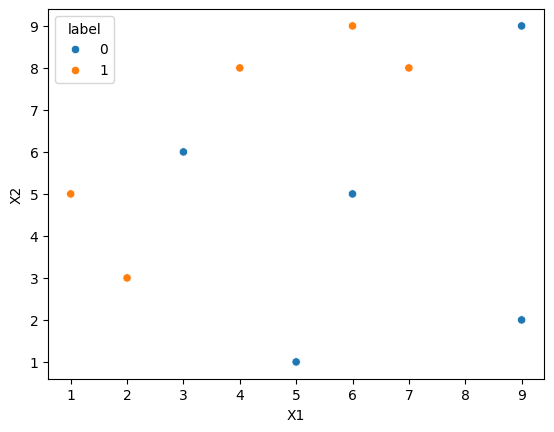

In [6]:
import seaborn as sns
sns.scatterplot(x=df['X1'], y = df['X2'], hue = df['label'])

In [9]:
df['weights'] = 1/df.shape[0]
# 10 rows so each will get 0.1 weight

In [10]:
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [ ]:
# Step 1: making 1st model
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier(max_depth = 1)
# max_depth = 1, decision stump

In [13]:
X = df.iloc[:,0:2].values
y = df.iloc[:,2].values

# step 2 - Train 1st model
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]'),
 Text(0.625, 0.5, '  False')]

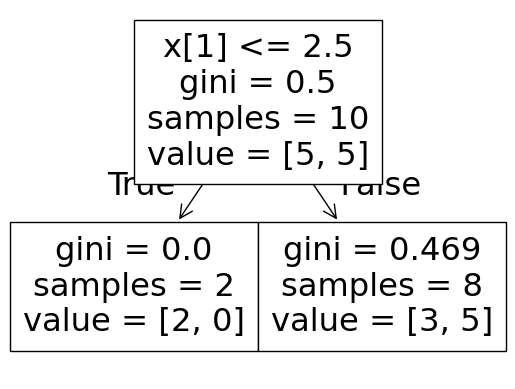

In [14]:
from sklearn.tree import plot_tree
plot_tree(dt1)

<Axes: >

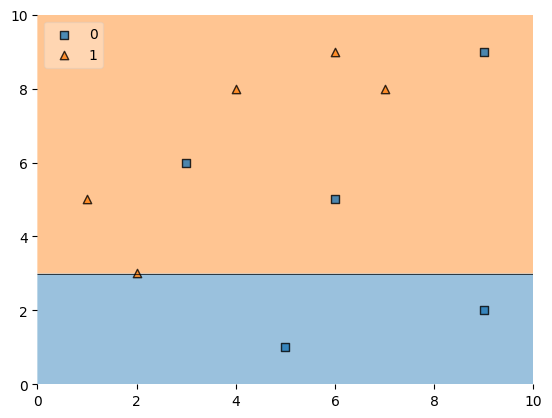

In [15]:
plot_decision_regions(X,y,clf=dt1,legend = 2)

In [18]:
df['y_pred'] = dt1.predict(X)
df


,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


In [32]:
def calculate_model_weight(error):
    return 0.5*np.log((1-error)/(error))

    # if we have a small dataset, we may have zero error, so in that case to avoid error, 
    # we may add a very small no. to denominator error
    # 0.5*np.log((1-error)/(error + 0.000001))


In [ ]:
# Step 3: calculate model weight
# error = 0.3 bcz 3 row glt classify hue h and each row has 0.1 weight, so error = sum of weights of all misclassified rows.
alpha1 = calculate_model_weight(0.3)
alpha1

0.42364893019360184

In [21]:
#Step 4 - update weights
def update_row_weights(row, alpha = 0.423):
    if row['label'] == row['y_pred']:
        return row['weights'] *np.exp(-alpha)
    else:
        return row['weights'] *np.exp(alpha)


In [22]:
df['updated_weights'] = df.apply(update_row_weights, axis = 1)
df

,X1,X2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,1,0.152653
3,4,8,1,0.1,1,0.065508
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,1,0.065508
6,6,5,0,0.1,1,0.152653
7,7,8,1,0.1,1,0.065508
8,9,9,0,0.1,1,0.152653
9,9,2,0,0.1,0,0.065508


In [25]:
# normalising 
df['normalised'] = df['updated_weights']/df['updated_weights'].sum()
df

,X1,X2,label,weights,y_pred,updated_weights,normalised
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,1,0.152653,0.166559
3,4,8,1,0.1,1,0.065508,0.071475
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,1,0.065508,0.071475
6,6,5,0,0.1,1,0.152653,0.166559
7,7,8,1,0.1,1,0.065508,0.071475
8,9,9,0,0.1,1,0.152653,0.166559
9,9,2,0,0.1,0,0.065508,0.071475


In [26]:
df['normalised'].sum()

1.0

In [28]:
# creating ranges
df['cumsum_upper'] = np.cumsum(df['normalised'])
df['cumsum_lower'] = df['cumsum_upper'] - df['normalised']
df


,X1,X2,label,weights,y_pred,updated_weights,normalised,cumsum_upper,cumsum_lower
0,1,5,1,0.1,1,0.065508,0.071475,0.071475,0.000000
1,2,3,1,0.1,1,0.065508,0.071475,0.142950,0.071475
2,3,6,0,0.1,1,0.152653,0.166559,0.309508,0.142950
3,4,8,1,0.1,1,0.065508,0.071475,0.380983,0.309508
4,5,1,0,0.1,0,0.065508,0.071475,0.452458,0.380983
5,6,9,1,0.1,1,0.065508,0.071475,0.523933,0.452458
6,6,5,0,0.1,1,0.152653,0.166559,0.690492,0.523933
7,7,8,1,0.1,1,0.065508,0.071475,0.761967,0.690492
8,9,9,0,0.1,1,0.152653,0.166559,0.928525,0.761967
9,9,2,0,0.1,0,0.065508,0.071475,1.000000,0.928525


In [29]:
def create_new_dataset(df):
    indices = []
    for i in range(df.shape[0]):
        a = np.random.random()
        for index, row in df.iterrows():
            if row['cumsum_upper'] > a and a > row['cumsum_lower']:
                indices.append(index)
    return indices

In [ ]:
index_values = create_new_dataset(df)
index_values
# upsampling

[9, 2, 7, 7, 2, 6, 2, 3, 6, 8]

In [31]:
second_df = df.iloc[index_values,[0,1,2,3]]
second_df

,X1,X2,label,weights
9,9,2,0,0.1
2,3,6,0,0.1
7,7,8,1,0.1
7,7,8,1,0.1
2,3,6,0,0.1
6,6,5,0,0.1
2,3,6,0,0.1
3,4,8,1,0.1
6,6,5,0,0.1
8,9,9,0,0.1
